In [1]:
import pandas as pd

# Criando um DataFrame de exemplo
data = {'Categoria': ['A', 'B', 'A', 'C', 'B']}
df = pd.DataFrame(data)

# Usando a função get_dummies() do pandas
dummies = pd.get_dummies(df['Categoria'])

# Concatenando as variáveis dummy ao DataFrame original
df = pd.concat([df, dummies], axis=1)

# Exibindo o resultado
print(df)

  Categoria  A  B  C
0         A  1  0  0
1         B  0  1  0
2         A  1  0  0
3         C  0  0  1
4         B  0  1  0


### Histogram generation for determined number of bins (no automatic choice of bins, must choose a value)

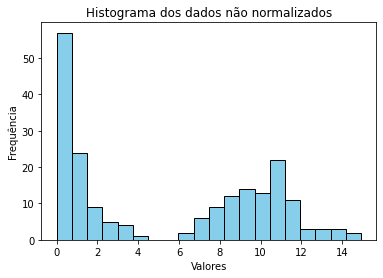

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Gerando dados não normalizados
np.random.seed(42)
dados = np.concatenate([np.random.exponential(scale=1, size=100),
                        np.random.normal(loc=10, scale=2, size=100)])

# Plotando o histograma dos dados
plt.hist(dados, bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma dos dados não normalizados')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()


### Manual binning using Scott Rule (generates balanced number of bins)

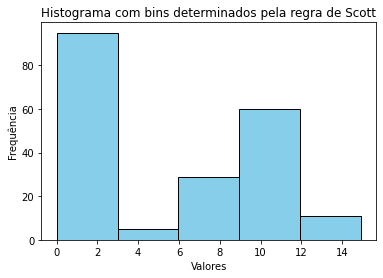

In [23]:
# Ideal nb of bins through Scott rule
n = len(dados)
width_bin = 3.5 * np.std(dados) / (n ** (1/3))

# Number of bins generated thanks to width, as (max_val - min_val) / width
n_bins = int((dados.max() - dados.min()) / width_bin)

# Hist plot with determined nb of bins
plt.hist(dados, bins=n_bins, color='skyblue', edgecolor='black')
plt.title('Histograma com bins determinados pela regra de Scott')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

In [6]:
n_bins

5

In [24]:
#width is fixed, therefore all bins have same size.
width_bin

2.851146342241247

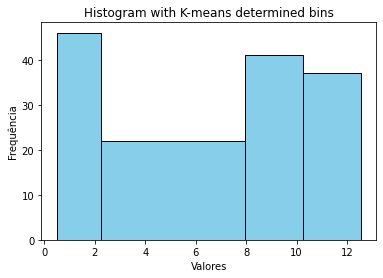

,Bin,Lower bound,Upper bound,Number of observations
0,1,0.489446,2.261539,46
1,2,2.261539,7.953777,22
2,3,7.953777,10.249695,41
3,4,10.249695,12.548923,37


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Number of bins you want to generate.
n_bins = 5

# With k-means algorithm, we group data in clusters corresponding to bins
kmeans = KMeans(n_clusters=n_bins, random_state=42)

#reshape(-1,1) converts an array into a column. no need to do it if you are applying it over a df column, 
#like kmeans.fit(df['dados'])
kmeans.fit(dados.reshape(-1, 1))


# bins limits are obtained by getting the centroids from the cluster (comes as a column)
#we .flatten() it so it become an unidimensional array.
limites_bins = np.sort(kmeans.cluster_centers_.flatten())

# Hist plot with bins determined by k-means
plt.hist(dados, bins=limites_bins, color='skyblue', edgecolor='black')
plt.title('Histogram with K-means determined bins')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

import pandas as pd

# Observation number in each bin
counts, _ = np.histogram(dados, bins=limites_bins)

#df creation with bins and number of observations (counts)
#this is a pretty way of showing the lower and upper bounds
df_bins = pd.DataFrame({'Bin': range(1, len(limites_bins)), 
                        'Lower bound': limites_bins[:-1],
                        'Upper bound': limites_bins[1:],
                        'Number of observations': counts})

# DataFrame show
display(df_bins)

